In [26]:
import pandas as pd #package for reading data
import numpy as np 
import matplotlib.pyplot as plt #package for creating plots

Import data into the notebook

In [27]:
data_folder = "drills_data/"
prices = pd.read_csv(data_folder + "clean_prices.csv")
print(prices.columns)

Index(['platform', 'website', 'date', 'zipcode', 'rank', 'page', 'query',
       'prod_id', 'upc', 'product', 'manufacturer', 'model', 'price',
       'list_price', 'in_stock', 'max_qty', 'seller', 'arrives', 'shipping',
       'shipping_price', 'shipping_options', 'store_stock', 'store_address',
       'store_zip', 'store_price', 'weight', 'reviews', 'rating', 'quantity1',
       'quantity2', 'quantity3', 'quantity4', 'quantity5', 'ads', 'calc_rank',
       'calc_inven', 'calc_promo', 'calc_ship', 'calc_purch'],
      dtype='object')


How many unique models of drill are in the data?

In [28]:
prices['label'] = prices['manufacturer'].astype(str) + " " + prices['model']

In [29]:
prices['label'].nunique()

465

In [30]:
prices.groupby('platform')['label'].nunique()

platform
AMZN    250
HD      173
LOW     218
WMT     144
Name: label, dtype: int64

How many unique manufacturers of drills are in the data? 

In [31]:
prices['manufacturer'].nunique()

108

In [32]:
prices.groupby('platform')['manufacturer'].nunique()

platform
AMZN    66
HD      28
LOW     21
WMT     49
Name: manufacturer, dtype: int64

Are adds/promotions correlated with the rankings? Create a scatter plot with the two variables.

In [66]:
price_ads = prices.groupby('label')['ads'].mean()
price_ads = price_ads[price_ads >0].index
ads_select = np.zeros(len(prices),dtype=bool)
for label in price_ads:
    ads_select =  (prices['label']==label) | ads_select
prices_ads = prices[ads_select]

In [67]:
# correlation
round(prices_ads['calc_rank'].corr(prices_ads['ads']), 4)

0.0612

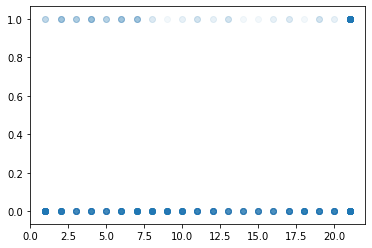

In [69]:
# scatterplot
plt.scatter(prices_ads['calc_rank'], prices_ads['ads'],alpha=.05)

How do average prices differ between products that are sponsored/advertised in the search results versus products that are not. i.e. report the average price for products that are advertised against those that are not.

In [73]:
avg_price_ads = pd.DataFrame(prices.groupby('ads')['price'].mean())
avg_price_ads

,price
ads,
0.0,139.014312
1.0,71.306791


In [74]:
avg_price_ads = pd.DataFrame(prices_ads.groupby('ads')['price'].mean())
avg_price_ads

,price
ads,
0.0,143.025531
1.0,75.429021


If a product stops being sponsored, does the price change?

In [72]:
avg_price_ads.iloc[0].subtract(avg_price_ads.iloc[1])

price    67.59651
dtype: float64

Create a variance, covariance matrix, separate for each platform, for the following variables:
* Weight
* Reviews
* Rating
* Rank
* Price

In [23]:
prices[['weight', 'reviews', 'rating', 'calc_rank', 'price','calc_ship']].mean()

weight        11.925497
reviews      453.236860
rating         4.574370
calc_rank     15.392608
price        137.824103
calc_ship      3.837644
dtype: float64

In [24]:
prices[['weight', 'reviews', 'rating', 'calc_rank', 'price','calc_ship']].max()

weight       1150.0
reviews      7780.0
rating          5.0
calc_rank      21.0
price         999.0
calc_ship       7.0
dtype: float64

In [15]:
prices[['weight', 'reviews', 'rating', 'calc_rank', 'price','calc_ship']].cov()

,weight,reviews,rating,calc_rank,price,calc_ship
weight,2604.423543,-2177.917210,-1.386643,-6.774162,2985.016447,17.859732
reviews,-2177.917210,774971.840514,20.603209,-1479.492667,-4733.282367,-464.236932
rating,-1.386643,20.603209,0.135394,-0.035587,-0.350495,-0.110205
calc_rank,-6.774162,-1479.492667,-0.035587,45.278658,-40.329812,0.142250
price,2985.016447,-4733.282367,-0.350495,-40.329812,20600.366505,3.681368
calc_ship,17.859732,-464.236932,-0.110205,0.142250,3.681368,5.834951
